# INTRODUCTION  TO NEURAL NETWORKS

Artificial neural networks (ANN) are inspired from biological neural networks and to some extend try to mimic the way the human brain is learning.  The human brain contains over 100 billion interconnected neurons and each of them one consists of three main components: soma, axon and dendrietes as can be seem in the following image (taken from https://en.wikipedia.org/wiki/Biological_neuron_model)



The exact way of how the biological neural networks work is not fully understood. The brain consists of billions of brain cells and trillions of interconnections thus it is very complicated to be understood and replicated to a closely mimicking it model. 

A loose analogy of how the brain is functioning can be seen in the following picture.  A brain cell is "wired" to an 'axon" which allows electrical current; the axon is connected with synapses that can "fire" when serving as input meaning that they can send a message to the brain cell (also known as neuron) which in turn will fire again and ultimately activate the synaptic output which will make the signal available for other neurons.  The strength of the signal is not the same but it depends on the dendrites that are "firing" it.

<img src="./images/biological-nn-summary.png" style="float:center;width:420px;"/>

### How ANN resembles biological neural networks

In Artificial Neural Networks we follow a loose analogy that tries to resemble the way the brain is functioning
by using a linear connectivity of subsequent layeres of **Neurons** that are connected 
via **synapses** each one having its own **weight**.

Based ont the analog input that each neuron receives it **fires** a new signal which is transimited
to the following layer until it reaches the **target** value, which is just another name for the
output that we are trying to predict.

The ANN the interaction between nodes is simulated using a polynomiam which connects each neural with a previous layer of neurons as can be seen here:

<img src="./images/ann-summary.png" style="float:center;width:420px;"/>

Some of the most important properties of ANN are the following:

| Property      | Description |
| ----------- | ----------- |
| **Exploits Non linearity** | Can model any other continue function having higher powers of x or trigonometric functions for example|
| **Adaptivity**   | The ANN can adopt its free parameters and continue learning new patters as they are presented to it by adjusting the synaptic weights|
|**Fault Tolerance**|Since the ANN can consist of thousands of synaptic weights, it is very robust and fault tolerant as a few "bad" synapses do not affect its behavior|
|**Evidencial Response**|The output of an ANN is also paired with a probability of correctnes which provides additional confidence in it|


#### ANN compared to Biological NN

| MLP ANN           | Real nervous system                                        |
|-------------------|------------------------------------------------------------|
| feedforward       | recurrent                                                  |
| fully-connected   | mostly local connections                                   |
| uniform structure | functional modules                                         |
| a few node types  | hundreds of neuron types                                   |
| 10–1000 nodes     | human brain: O(1011) neurons O(1015) synapses              |
| mostly static     | dynamic: spike trains facilitation fatigue synchronization |

### Bibliography 

Some of the best books I have studied during the years about NN are the following:

<table>
    <tr>
        <td>
            <img src="./images/neural-smithing.jpg" style="float:center;width:120px;"/>
        </td>
        <td style="text-align:left">
            Very comprehensive coverage of the basics of NN; strongly recommended if you want 
            to delve in to the related theory and math.
        </td>
    </tr>
    <tr>
        <td>
            <img src="./images/deep-learning.jpg" style="float:center;width:120px;"/>
        </td>
        <td style="text-align:left">
            Covers the theory behind the modern evolutions of NN covering convolutional and recurrent NN.
        </td>
    </tr>
    <tr>
        <td>
            <img src="./images/machine-learning-theodoridis.jpg" style="float:center;width:120px;"/>
        </td>
        <td style="text-align:left">
           Advanced text, coverings topics like Sparse data, Learning Kernels, Deep Learning.
        </td>
    </tr>
    <tr>
        <td>
            <img src="./images/OO-NN-CPP.jpg" style="float:center;width:120px;"/>
        </td>
        <td style="text-align:left">
                 Older text, my first boon on NN (late nineties), still has some something to teach us (needs a solid understanding of C++ though!)
        </td>
    </tr>
    <tr>
        <td>
            <img src="./images/hundred-page-ml-book.jpg" style="float:center;width:120px;"/>
        </td>
        <td style="text-align:left">
                 Summarizes the theory behind NN, good starting point.
        </td>
    </tr>
    <tr>
        <td>
            <img src="./images/math-for-machine-learning.jpg" style="float:center;width:120px;"/>
        </td>
        <td style="text-align:left">
                 Perfect if you need a math refresher.
        </td>
    </tr>
</table>
    

###  The simplest  Neural Network

Let's start with the most simplified example of a neural and right after we will generalize 
our findings to more complicated topologies that will allow us to solve some basic problems 
that still cannot be solved following the **traditional** approach to programming.

The schema of this ANN is the following:

<img src="./images/simplest-possible-ann.png" style="width:520px;"/> 

In this picture, we display known values with green color,red the unknown and blue for the calculated.

The unknown value is the weight ($w$) for the connection of $x$ to $y$.

**It is important to understand the simple case in depth**

Although this is the simplest possible NN that we are seeing here  it still can serve as the basis for very complicated solutions that conceptually are very similar to it thus it is worth it to study it in depth as it will later help us to understand way more sophisticated NN architectures.

&nbsp;
<div style="background:LightYellow">
Please do not get intimidated from the mathematical calculations that are involved here (in reallity they are very simple if you know some basic calculus) and do not hesitate to spend some time trying to repeat the mathematical proof using pen and pencil.
</div>

**The linear relationship between $x$ and $y$**

If $w_0$ is the given value of the input and $y$ the expected we can express the relationship between them as follows:

&nbsp;
$\Large y = x_0 \times w_1$

Our objective will be to find the best possible value for the **weight** than will **minimize** the Loss function which will be a measurement of how accurate our predictions are.

<img src="./images/simplest-nn-image-1.png" style="width:100%;"/> 



#### Understanding the problem

To make the problem easier to understand let's make it a little more concrete by
assuming that:

$\Large a=1.6$

and 

$\Large E=3.0$


For these values the graphical representation of the above function will be as follows:


<img src="./images/simplest-nn-image-2.png" style="width:100%;"/> 

Now we can plot the Cost function and 

<img src="./images/simplest-nn-image-3.png" style="width:100%;"/> 

<img src="./images/simplest-nn-image-4.png" style="width:100%;"/> 



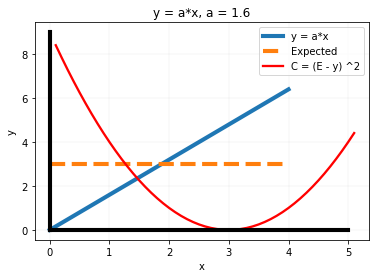

In [47]:
import matplotlib.pyplot as plt

a = 1.6

E = 3.0

f = lambda x: a * x
X = [ x for x in range(0, 5)]
Y = [f(x) for x in X]
plt.plot(X, Y, linewidth = 4.1);
plt.plot(X, [E for _ in X] , linewidth = 4.1, linestyle = '--');

# plt.plot([1.85 for _ in range(0,5)], [y for y in range(0,5)]);


_ = plt.title(f"y = a*x, a = {a}")

_ = plt.xlabel('x')
_ = plt.ylabel('y')

error = lambda x: (x - E)**2

x_values = []
v = 0
while v < 5:
    v += 0.1
    x_values.append(v)

Y = [error(x) for x in x_values]
plt.plot(x_values, Y, linewidth=2.3, color="red")


plt.plot([x for x in range(0, 6)], [0 for x in range(0, 6)], color="black", linewidth = 4.1)
plt.plot([0 for x in range(0, 10)], [y for y in range(0, 10)], color="black", linewidth = 4.1)

plt.grid(color = 'gray', linestyle = '--', linewidth = 0.1)

plt.legend(['y = a*x', "Expected" , 'C = (E - y) ^2'])



#### The Loss (also known as Cost or Error) function

The loss function of a NN compares the expected against the predicted
values.  It  expresses how well the NN fits the training data while
the goal of the training process is to minimize it by applying an
iterative process which repeats the weight adjustment until a specific
requirement will be met.

In most of the times the terms Loss, Cost or Error function can be 
used as synonyms and usually they are symbolized with one of the 
L, C or E letters.


One commonly used lossed function is **Mean Squared Error (MSE)** which is expressed by the following formula:

$\Large C = \frac{1}{N} \sum_{i=1}^{N} (y_i - Y)^2$



Where:
- C: The cost (also used as loss or error).

- Y: The expected (correct) value (known in advance).

- $y_i$: The calculated value.

As a starting point to understanding the training of the ANN it helps to make things more intuitive and think of the **Cost** function as a a unique calculation expesses by the following equation:

$\Large C = (y - Y) ^ 2$

The above **Cost** function is a **parabola** that can be graphed as follows (assuming that $Y=0.4$):



import functools
import sys

import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def plot(function, v1, v2, step=0.1, plot_axes=False):
    x = [v1]
    while x[-1] < v2:
        x.append(x[-1]+ step)
    y = [function(v) for v in x]
    plt.plot(x, y)
    plt.xlabel('x')
    plt.ylabel('y')
    #  Plot axes.
    if plot_axes:
        plt.plot(x, [0 for _ in range(len(x))], color='gray',  linewidth=3)
        plt.plot([0 for _ in range(len(y))], y, color='gray',  linewidth=3)
        plt.grid( linestyle='--')

In [ ]:
plot(lambda x: (x - 0.4) ** 2 , -1.4, 2.2 , step=0.001)

#### Find the derivative of the function

If we write our function as follows:
Using calculus I we can easily calcuate the derivate of the Loss function:

$ \Large y=(x-a)^2= x^2-2ax+a^2$

so:

$\Large \frac{dy}{dx}=2(x-a)$

#### Plot the tangent lines two arbitrary points

For a given point X that belongs to the loss function the equation for the tangent line to it is given by the following:

$\Large g(x) = f'(X) (x-X) + f(X)$ 
 
which graphically results to the following represenation:

In [ ]:
mix_x, max_x = -1.4, 2.2
a = 0.4
plot(lambda x: (x - 0.4) ** 2 , -1.4, 2.2 , step=0.001)
derivative = lambda x: 2 * (x-a)

def tangent_line(x, X):
     return derivative(X) * (x - X) + (X - 0.4) **2

X1, X2 = 1.5, -0.5

plot(functools.partial(tangent_line, X=X1) , 0.6, max_x, step=0.01)
plot(functools.partial(tangent_line, X=X2) , -1, 0.097, step=0.01)


As we can notice from the above graphical represenation, the derivate of point is positive when it lies on the right of the minuum value and negative otherwise.  Based on this notification, we will try to approach the  value of x that minimizes the function by adding or subtracting a small step each time.

See for example:

$\Large f'(1.5) = 2.2$

$\Large f'(-0.5) = -1.8$

It is easy to prove that the minimum value of our function will be 0 and this will be the outcome of the function when x becomes a:

$\Large minf(x) = f(a) = 0$

<div>
Also we can see that the slope of the tangent line (derivative) for our function has a positive value when we are on the right of $x=a$ and negative when on the left.  This is very important for our procedeure as it dicatates the **sign** of the alteration we need to apply to x; in other words if the slope will be postive we will need to subtract a small value from the current value otherise we will add to it.

So, if we pretend that we do not know the analytical solution of how to find the minimum value for the function $f(x)$ we can start from any arbitrary value of x and start moving accros the axis of x until we will find the value of x that will have the minimum value.

<img src="./images/backprog-1.png" style="width:220px;"/>
</div>

As we can see in the above picture, we need to move the $x$ by a value $Δx$ towards the **left** direction (meaning subtracting a small value) to find a lower value for $y$.  

This movement depends on two factors:

**Learning rate**

<div>
<img src="./images/learning-rate.png" style="width:620px;"/>
You can thing of the learning rate as the unit of weight change per each learning iteration.  
The learning rate is one of the hyperparameters of the ANN and most of
times finding its best value results in a trial and error procedure since
avery small learning rate will result to very slow training process while
a very large might not be able to find the minumum value. 
</div>
<br>


The following pictute helps to develop intution about how a large vs a smaller learning rate value might affect learning ([source](https://www.ibm.com/cloud/learn/gradient-descent#:~:text=Gradient%20descent%20is%20an%20optimization,each%20iteration%20of%20parameter%20updates))


In practice the learning rate is a value that ranges anywhere from 0.01 to
0.0001 while modern machine learning libraries provide functions that allow
the training procedure to adjust it based on several user defined criteria.



**The partial derivate of cost over weight**

Expresses the impart that a specific weight has over a calculated value.

It can be positive or negative and its value give us an indicator of how important the specific weight is in the calculated value.


#### The weight adjustment

During each iteration phase each weight of the ANN will be adjusted based on the following formula:

$\Large w_{n+1}= w_n - R * \frac{\partial C}{\partial w}$

where:

| Syntax                               | Description                              |
| -------------------------------------| -----------------------------------------|
| wn+1                    | The weight during the n + 1 epoch            |
|$\Large w_n$                          | The weight during the n-th epoch         |
|$\Large R$                           | The learning rate                        |
|$\Large \frac{\partial C}{\partial w}$|The partial derivative of Cost over weight|


#### Adjusting the weight using back propagation

In our example we only have one observation consistinting
of one input: $x_0 = 1$ and one expected output $Y=0.5$

We randomly assign a weight, let say 0.3 thus
we know can have a prediction:

$\Large x_1 = x_0 \times w = 1 \times 0.3 = 0.3$

since the expected output is 0.5 the **Cost** will be:

$\Large C = (x_1 - Y)^2 = (0.3 - 0.5) ^2 = 0.04$

Since the only parameter that can be changed in the NN is the weight, what we need is the 
rate of the Loss over weight or more formally:

$\Large \frac{\partial L}{\partial w}$


As discussed above the derivate of the cost function will be

$\Large\frac{\partial C}{ \partial x}=2(x_1 - Υ)$

while the derivate of the predicted value will be:

$\Large\frac{\partial x}{\partial w}=x_0$

$\Large\Large\frac{\partial C}{\partial w} = \frac{\partial C}{\partial x} \times  \frac{\partial x}{\partial w}  \Rightarrow$


$\Large\frac{\partial L}{\partial w} = 2(x_1 - Υ) \times x_0 \Rightarrow$

$\Large\frac{\partial L}{\partial w} = 2(x_0 \times w_0 - Υ) \times x_0$


So the new weight will be given by the following formula:

$\Large w_1 = w_0 - R\times 2(x_0 \times w_0 - Υ) \times x_0$

By substituding the follwing values:

| Variable    | Description                     | Value|
| ----------- | --------------------------------|-------
| $w_0$       | The weight during the 1st epoch |0.3|
| $R$        | The learning rate               |0.01|
| $x_0$       | The input value for x           |1|
| $Y$         | The expected value for Y        |0.5|




#### Understanding the simpler possible ANN (consisting of only two neurons)

The data that we need in order to **train** our model are the simplest possible and consider of just a pair of an input and its desiser output.  Some as simple as the following is enough for us to start our first contact with neural networks.

| Input| Output |
| --- | --- |
| 1 | 0.5 |


We can visualize this ANN as follows:

<img src="./images/simplest-nn.png" style="width:420px;"/>

And following the algorithm that is presented above we can code a training session as follows:

In [ ]:
w = 0.3
lr = 0.01
x0 = 1
Y = 0.5
loss = sys.maxsize
history = []

while loss > 0.00001:
    w = w - lr * 2 * (x0 * w - Y ) * x0
    loss = (Y - x0*w)**2
    history.append([loss, w])

print(f"Best estimate for w: {w:8.4}")
df = pd.DataFrame(history, columns = ['Loss', 'Weight'])


In [ ]:
df

In [ ]:
_ = df.Loss.plot(title="Loss")

In [ ]:
_ = df.Weight.plot(title="Weight")

#### Adding a hidden layer to the 2 neural NN

Now that we understand the simplest possible case of an ANN that consists
of two neurons (or two layers having a single neuron each one) we can add
more layers (again consisting of a single neuron) and see how the above
mechanism to train the weights can be generalized.

Keep the rest of the constraints, let' add one more **hidden layer** to the
above network which now will look as follows:

<img src="./images/ann-3-layers.png" style="width:520px;"/> 

We are given the values for the input x0, the weights w1 and w2 are assigned 
randomly, we are given the expected value Y and our objective is to **train**
the ANN assigning to the weights w1 and w2 the best values we can find so the 
Cost (or loss or error) will be minimized.

Repeating what we have done above, the cost function will be:

$\Large C = (x_2 - Y) ^2$ 

while its **gradient descent** (here derivative) will be the following:


$\Large\frac{\partial C}{\partial x_2} = 2(x_2 - Υ)$

The objective is to run serveral consecutive iterations trying to adjust the 
randomly selected weights trying to minimize the **Cost**.

Assuming a learning rate of **η** the new weight for each iteration will be 
given from the following formula:

$\Large w_i' = w_i - \eta \times  \frac{\partial C}{\partial w_i}$

What we are missing for now from the above formula is the following:

$\Large \frac{\partial C}{\partial w_i}$

which can be thought as the **impact** that a particular weigtht has on
the **Cost**.  Note though that we already have the rate of how much a change
in the value of $\Large x_2$ is affecting the cost $\Large\frac{\partial C}{\partial x_2}$.

# PAY ATTENTION HERE !

## Step 1: Calculate the next value for $\Large w_2$

This step is one of the MOST important to understand how backpropagation works, 
so please read carefully:

We want to calculate: $\Large \frac{\partial C}{\partial w_2}$ so, let's try the following trick:

Is it possible for us to write our expression as follows?

$\Large \frac{\partial ?}{\partial w_2} \times \frac{\partial C}{\partial ?}$

Think now: Can we substitue $\Large {\partial ?}$ with something that will result 
to two partial derivatives that is known to us? 

If we can do so then we would have our prolbem solved (applying the **CHAIN RULE** from Calculus)

Since we already have calculated: $\Large\frac{\partial C}{\partial x_2}$

we immediatly think if we can try the following:

$\Large \frac{\partial x_2}{\partial w_2} \times \frac{\partial C}{\partial x_2}$

or in other words to calculate the following expression:

$\Large \frac{\partial x_2}{\partial w_2}$

which expresses the impact of $\Large w_2$ to $\Large x_2$

and we are in luck since this derivative is really easy to calculate:

since $\Large x_2 = x1 \times w_2$ then 

$\Large \frac{\partial x_2}{\partial w_2} = x_1$


So we can now calculate:

$\Large \frac{\partial C}{\partial w_2} = \Large \frac{\partial x_2}{\partial w_2} \times \frac{\partial C}{\partial x_2}  = x_1 \times 2(x_2 - Υ)$

while the new value for $w_2$ for the next iteration will be:

$\Large w_2' = w_2 - \eta \times  x_1 \times 2(x_2 - Υ)$

## Step 2: Calculate the next value for $\Large w_1$

Now, we need to calculate: $\Large \frac{\partial C}{\partial w_1}$ 

we think similarly to before but with one more trick! We will have to add one more
layer to our **chain** of derivations as follows:

$\Large \frac{\partial C}{\partial w_1}$ 


$\Large \frac{\partial C}{\partial w_1} = \Large \frac{\partial ? }{\partial w_1} \times \Large \frac{\partial x_2}{\partial ?} \times \frac{\partial C}{\partial x_2}$

Now is is easly to see that the question mark should be substituted by the ${\Large \partial x_1}$

and our expression now it will become:

$\Large \frac{\partial C}{\partial w_1} = \Large \frac{\partial x_1 }{\partial w_1} \times \Large \frac{\partial x_2}{\partial x_1} \times \frac{\partial C}{\partial x_2}$


Since,

$\Large \frac {\partial x_1} {\partial w_1}  = x_0$

$\Large \frac {\partial x_2} {\partial x_1}  = w_2$

$\Large\frac{\partial C}{\partial x_2} = 2(x_2 - Υ)$

we have:

$\Large \frac{\partial C}{\partial w_1} = x_0 \times w_2 \times 2(x_2 - Y)$ 

and 

$\Large w_1' = w_1 - \eta \times  x_0 \times w_2 \times 2(x_2 - Y)$

#### Adding a hidden layer to the 2 neural NN

Now that we understand the simplest possible case of an ANN that consists
of two neurons (or two layers having a single neuron each one) we can add
more layers (again consisting of a single neuron) and see how the above
mechanism to train the weights can be generalized.

Keep the rest of the constraints, let' add one more **hidden layer** to the
above network which now will look as follows:

<img src="./images/ann-3-layers.png" style="width:520px;"/> 

We are given the values for the input x0, the weights w1 and w2 are assigned 
randomly, we are given the expected value Y and our objective is to **train**
the ANN assigning to the weights w1 and w2 the best values we can find so the 
Cost (or loss or error) will be minimized.

Repeating what we have done above, the cost function will be:

$\Large C = (x_2 - Y) ^2$ 

while its **gradient descent** (here derivative) will be the following:


$\Large\frac{\partial C}{\partial x_2} = 2(x_2 - Υ)$

The objective is to run serveral consecutive iterations trying to adjust the 
randomly selected weights trying to minimize the **Cost**.

Assuming a learning rate of **η** the new weight for each iteration will be 
given from the following formula:

$\Large w_i' = w_i - \eta \times  \frac{\partial C}{\partial w_i}$

What we are missing for now from the above formula is the following:

$\Large \frac{\partial C}{\partial w_i}$

which can be thought as the **impact** that a particular weigtht has on
the **Cost**.  Note though that we already have the rate of how much a change
in the value of $\Large x_2$ is affecting the cost $\Large\frac{\partial C}{\partial x_2}$.



### Adding more hidden layers

The process we have described above can now be generalized to cover as many
hidden layers we need.

Here is how we can carry on the chain rule to any number of hidden layers.

Try to understand how this is possible

Hint: The key is to realize that the formula:

$\Large x_i = w_i \times x_{i-1}$

allows us to calculate both:

$\Large \frac {\partial x_i} {\partial w_i} = x_{i-1}$


$\Large \frac {\partial x_i} {\partial x_{i-1}} = w_i$


For example lets find the new weight $w_2$

<img src="./images/nn-multiple-hidden-layers.png" style="width:620px;"/> 
   


#### Generalizing for more than one synapsis

The same process we have seen so far in the simple case of a singe connection
between layers can easily by generalized using again the chain rule as we ca
see here:

<img src="./images/two-x-nn.png" style="width:520px;"/>"

### Adding more hidden layers

The process we have described above can now be generalized to cover as many
hidden layers we need.

Here is how we can carry on the chain rule to any number of hidden layers.

Try to understand how this is possible

Hint: The key is to realize that the formula:

$\Large x_i = w_i \times x_{i-1}$

allows us to calculate both:

$\Large \frac {\partial x_i} {\partial w_i} = x_{i-1}$

and

$\Large \\frac {\partial x_i} {\partial x_{i-1}} = w_i$



For example lets find the new weight $w_2$

<img src="./images/nn-multiple-hidden-layers.png" style="width:620px;"/> 


#### Generalizing for more than one synapsis

The same process we have seen so far in the simple case of a singe connection
between layers can easily by generalized using again the chain rule as we ca
see here:

<img src="./images/two-x-nn.png" style="width:520px;"/>"
